<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='../../../pics/banner.PNG'/></a>
</div>
<div>
<img src='../../../pics/miw.PNG'/>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Basis Statistiek / SQL </h1>

<h2>Imports<h2>

In [19]:
!pip list | grep venn

matplotlib-venn          0.11.9


In [20]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
from PIL import Image
import pandas as pd
import sqlite3
from pathlib import Path

<h2>Extract, Transform and Load</h2>

<h3>Extract</h3>

In [21]:
# https://raw.githubusercontent.com/ajturner/acetate/master/places/Countries-Europe.csv
eurCsvFile = "../csv/countries_europe.csv"
euCsvFile = "../csv/european_union.csv"

 # Create Pandas DataFrames
europeDF = pd.read_csv(eurCsvFile, sep=',', header=0)
euDF = pd.read_csv(euCsvFile, sep=',', header=0)
db = "europe.db"

In [22]:
benelux = {"Belgium", "The Netherlands", "Luxembourg"}
nordics = {"Denmark", "Finland", "Iceland", "Norway", "Sweden"}
baltics = {"Estonia", "Latvia", "Lithuania"}

<h3>Load</h3>

<p>Maak een lege database</p>

In [23]:
!sqlite3 europe.db "VACUUM;"

**Maak verbinding met de database**

In [24]:
# Connect to SQLite database
dbConnection = sqlite3.connect(db)
#dbCursor = dbConnection.cursor()

<p>Maak tabellen <u>countries</u> en <u>eu</u> o.b.v. de dataset</p>

In [25]:
europeDF.to_sql('countries', dbConnection, if_exists='replace', index = False)
euDF.to_sql('eu', dbConnection, if_exists='replace', index = False)

27

**Gebruik een SQL query voor het selecteren van bepaalde kolommen / features****Gebruik een SQL query voor het selecteren van bepaalde kolommen / features**

In [34]:


query = """
    SELECT *
    FROM countries
    WHERE Code='UKR'
"""
# cursor.execute(query)

# # Fetch all the results
# result = cursor.fetchall()
result = cursor.execute(query).fetchall()
print(result)
print(type(result))

[(3, 'Ukraine', 'Ukr.', 'UKR', 804, 603700.0, 45415596, 49.0, 32.0, 'eu')]
<class 'list'>


<h3>Exercise 1</h3>
<p>
    Gebruik SQL queries voor het <u>joinen</u> van de tabellen <u>countries</u> en <u>eu</u> o.b.v. <u>Code</u>
</p>

In [38]:
# Oplossing
query = """
    SELECT *
    FROM countries
    FULL OUTER JOIN eu
    ON countries.Code = eu.Code
"""
result = cursor.execute(query).fetchall()
print(len(result))
print(type(result))

47
<class 'list'>


<h2>Afhankelijke en onafhankelijke variabelen</h2>

<h3>Overlappende uitkomsten</h3>

In [28]:
eu = {"Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "The Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"}
benelux = {"Belgium", "The Netherlands", "Luxembourg"}
nordics = {"Denmark", "Finland", "Iceland", "Norway", "Sweden"}
baltics = {"Estonia", "Latvia", "Lithuania"}

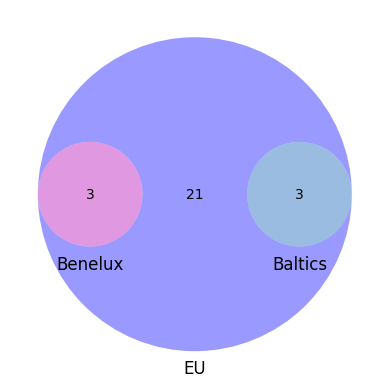

In [29]:
venn3([benelux, baltics, eu], ('Benelux', 'Baltics', 'EU'))

<h3>Exercise 2</h3>
<p>
    Gebruik SQL queries voor het verkrijgen van
<ol>
    <li>P(Nordics); de kans dat een Europees land onderdeel is van de Nordics</li>
    <li><u>P(EU)</u>; de kans dat een Europees land lid is van de Europese Unie</li>
    <li><u>P(EU and Nordics)</u>; de kans dat een land onderdeel is van de Norics en lid is van de EU</li>
</ol>
Bereken met bovenstaande gegevens P(EU|Nordics); de kans dat een Europees land lid is van de Europese Unie gegeven dat het in de Nordics</li>
</p>

In [30]:
# Close connection to SQLite database

dbConnection.close()